# Comandos usuales para la exploración de datos con Pandas y Matplotlib

In [1]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt

### 1. Cargar un dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

### 2. Exploración básica del dataset

In [4]:
# Mostrar las primeras filas del dataset
print("Primeras 5 filas del dataset:")
df.head()

Primeras 5 filas del dataset:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
# Resumen estadístico del dataset
print("\nResumen estadístico del dataset:")
df.describe()


Resumen estadístico del dataset:


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 3. Visualización de los datos

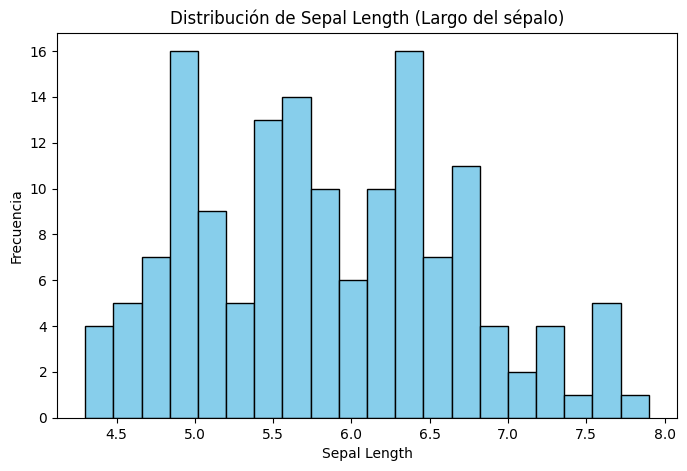

In [6]:
# Histograma de la columna 'sepal_length'
plt.figure(figsize=(8, 5))
plt.hist(df['sepal_length'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Sepal Length (Largo del sépalo)')
plt.xlabel('Sepal Length')
plt.ylabel('Frecuencia')
plt.show()

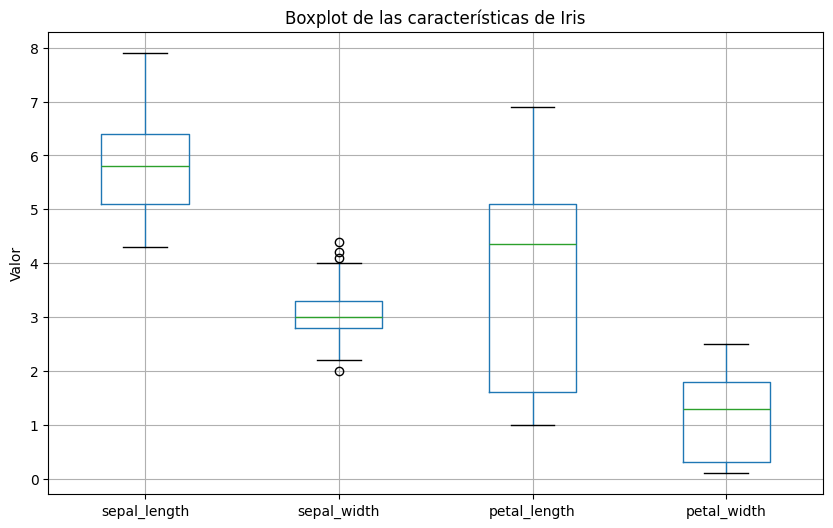

In [7]:
# Boxplot de las características de las flores
plt.figure(figsize=(10, 6))
df.boxplot(column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.title('Boxplot de las características de Iris')
plt.ylabel('Valor')
plt.show()

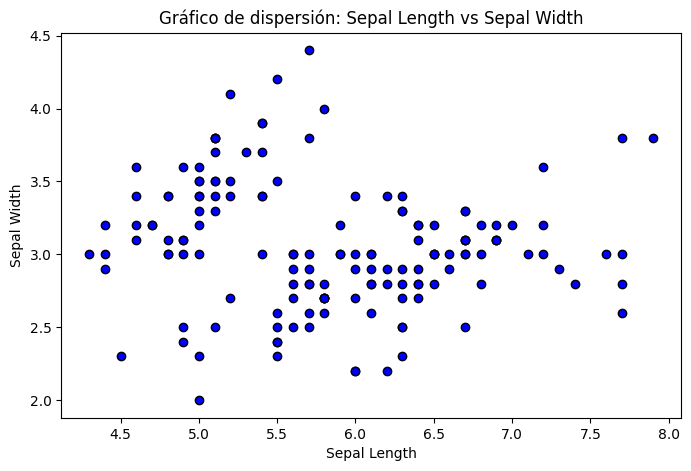

In [8]:
# Gráfico de dispersión (scatter plot) entre 'sepal_length' y 'sepal_width'
plt.figure(figsize=(8, 5))
plt.scatter(df['sepal_length'], df['sepal_width'], c='blue', edgecolor='black')
plt.title('Gráfico de dispersión: Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

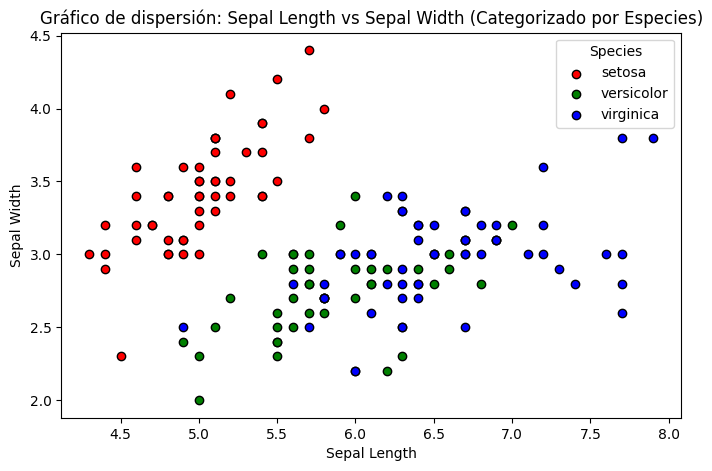

In [9]:
# Gráfico de dispersión categorizado por 'species' (color por especie)
plt.figure(figsize=(8, 5))
species_colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
for species, color in species_colors.items():
    subset = df[df['species'] == species]
    plt.scatter(subset['sepal_length'], subset['sepal_width'], label=species, color=color, edgecolor='black')

plt.title('Gráfico de dispersión: Sepal Length vs Sepal Width (Categorizado por Especies)')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(title='Species')
plt.show()

### 4. Filtrado y agrupación de datos con visualización

In [12]:
# Agrupar por 'species' y calcular la media de las otras columnas
grouped_df = df.groupby('species').mean()
print("\nMedia de las características por especie:")
grouped_df


Media de las características por especie:


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


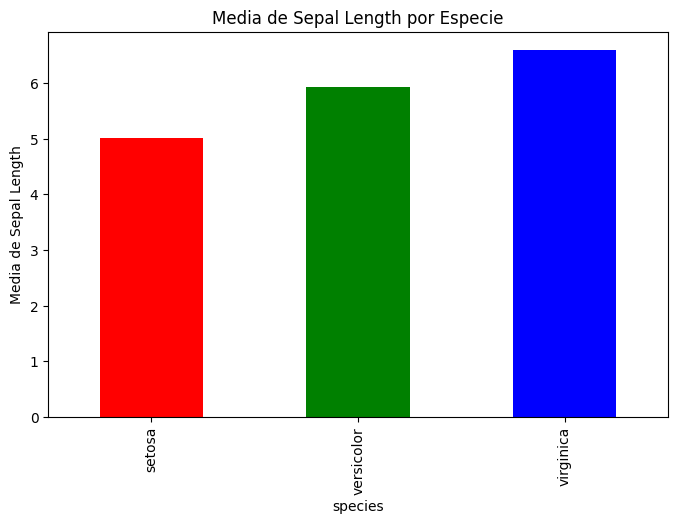

In [13]:
# Visualización de la media de 'sepal_length' por especie
grouped_df['sepal_length'].plot(kind='bar', color=['red', 'green', 'blue'], figsize=(8, 5))
plt.title('Media de Sepal Length por Especie')
plt.ylabel('Media de Sepal Length')
plt.show()

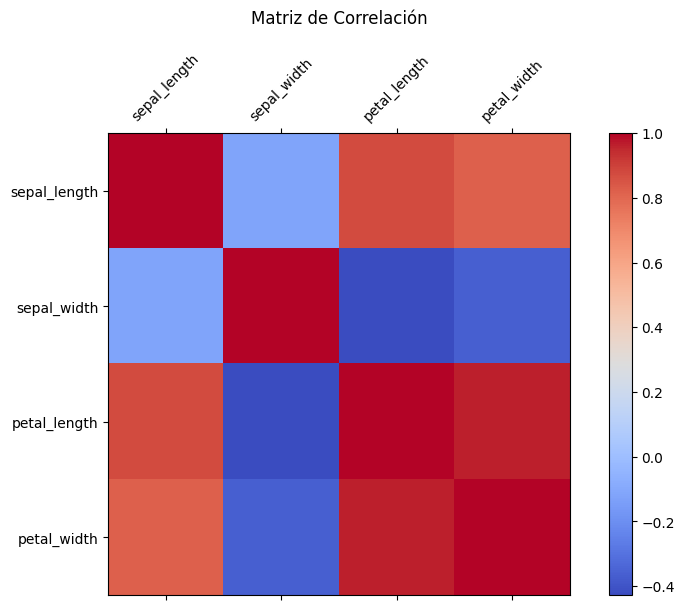

In [15]:
# 5. Gráfico de correlación
plt.figure(figsize=(10, 6))
correlation_matrix = df[[col for col in df.columns if col != 'species']].corr()
plt.matshow(correlation_matrix, fignum=False, cmap='coolwarm')
plt.colorbar()
plt.title('Matriz de Correlación', pad=20)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()